In [1]:
from api import *
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
api = Api()

In [3]:
api.get_persons()

{1: <person.Person at 0x7d276d21ecb0>,
 2: <person.Person at 0x7d27a4176320>,
 3: <person.Person at 0x7d2766eeb580>,
 4: <person.Person at 0x7d2760bac7f0>,
 5: <person.Person at 0x7d275a851960>,
 6: <person.Person at 0x7d27544f2ad0>,
 7: <person.Person at 0x7d274e197c40>,
 8: <person.Person at 0x7d2747e44df0>,
 9: <person.Person at 0x7d2741ae5fc0>,
 10: <person.Person at 0x7d273b57b130>,
 11: <person.Person at 0x7d2735234340>,
 12: <person.Person at 0x7d272eedd4b0>,
 13: <person.Person at 0x7d2728b7e620>,
 14: <person.Person at 0x7d272281f790>,
 15: <person.Person at 0x7d271c4c8940>,
 16: <person.Person at 0x7d271616dab0>,
 17: <person.Person at 0x7d270fdfac20>,
 18: <person.Person at 0x7d2709aa7d90>,
 19: <person.Person at 0x7d270375cf40>,
 20: <person.Person at 0x7d26fd4060b0>,
 21: <person.Person at 0x7d26f6ea7220>,
 22: <person.Person at 0x7d26f0b583d0>,
 23: <person.Person at 0x7d26ea7f9540>,
 24: <person.Person at 0x7d26e44866b0>,
 25: <person.Person at 0x7d26de133820>,
 26: <per

In [4]:
person1 = api.get_person(1)

In [5]:
person1.get_videos()

{0: <video.Video at 0x7d276de8fa00>,
 1: <video.Video at 0x7d276d24c7f0>,
 2: <video.Video at 0x7d276d24df30>,
 3: <video.Video at 0x7d276d24f880>,
 4: <video.Video at 0x7d276d265240>,
 5: <video.Video at 0x7d276d266c80>,
 6: <video.Video at 0x7d276d270640>,
 7: <video.Video at 0x7d276d272080>,
 8: <video.Video at 0x7d276d273a60>,
 9: <video.Video at 0x7d276d281420>,
 10: <video.Video at 0x7d276d282e60>,
 11: <video.Video at 0x7d276d290820>,
 12: <video.Video at 0x7d276d292260>,
 13: <video.Video at 0x7d276d293c40>,
 14: <video.Video at 0x7d276d2a9600>,
 15: <video.Video at 0x7d276d2ab040>,
 16: <video.Video at 0x7d276d2bca00>,
 17: <video.Video at 0x7d276d2be440>,
 18: <video.Video at 0x7d276d2bfe20>,
 19: <video.Video at 0x7d276d2cd7e0>,
 20: <video.Video at 0x7d276d2cf220>,
 21: <video.Video at 0x7d276d2dcbe0>,
 22: <video.Video at 0x7d276d2de620>,
 23: <video.Video at 0x7d276d2dfdc0>,
 24: <video.Video at 0x7d276d2eda20>,
 25: <video.Video at 0x7d276d2ef400>,
 26: <video.Video at 0

In [6]:
video1_1 = person1.get_video(1)

(8064, 14)
Index([1, 2, 3, 4, 7, 11, 13, 17, 19, 20, 21, 25, 28, 31], dtype='int64')


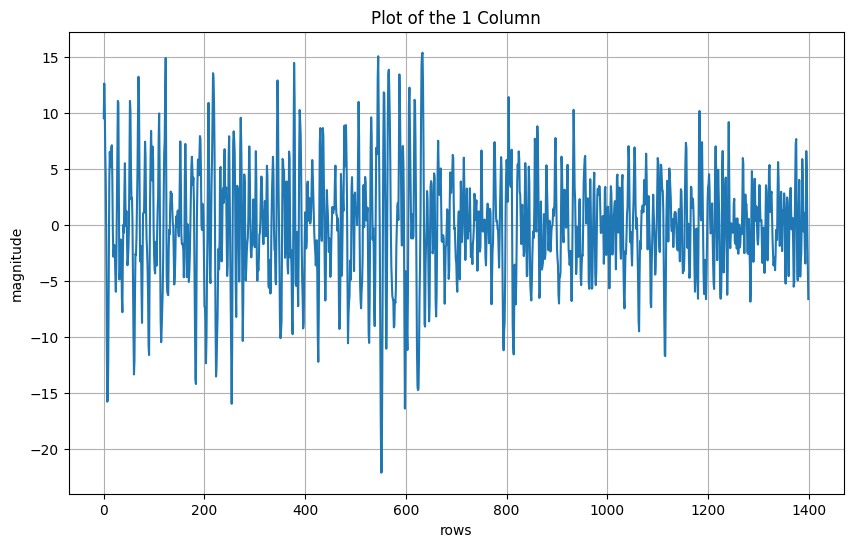

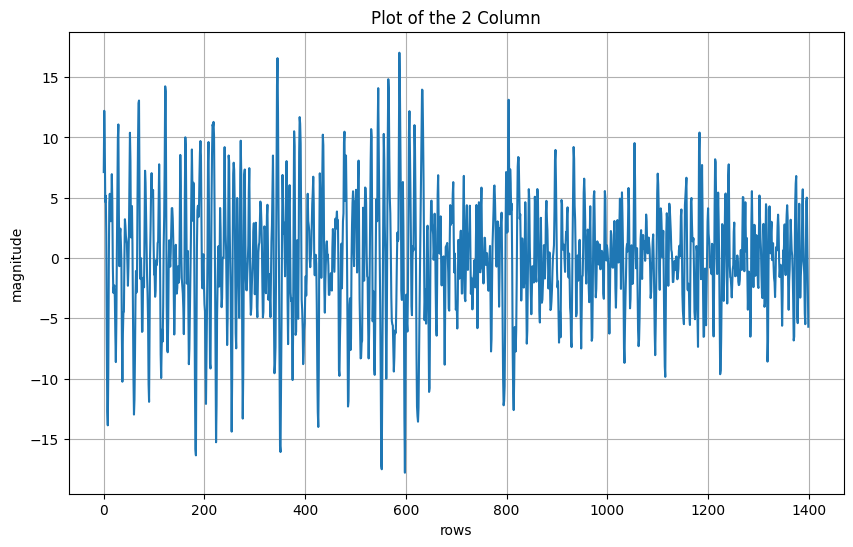

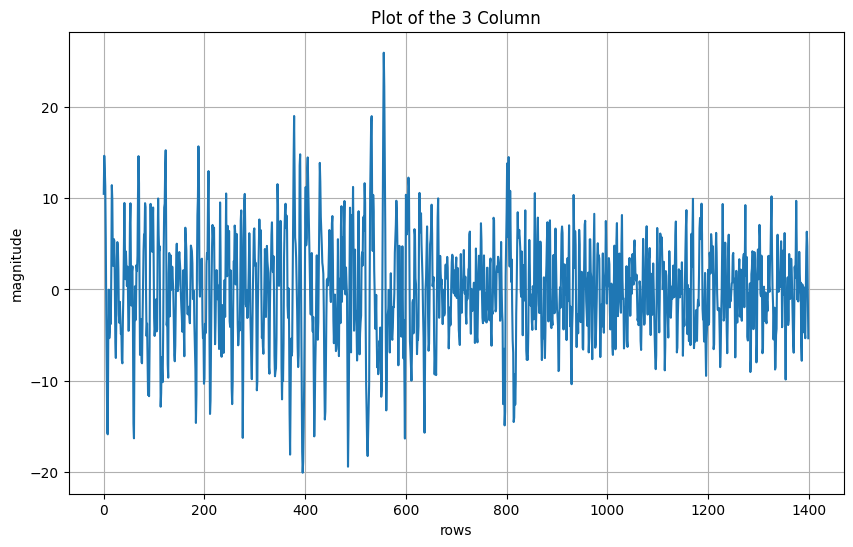

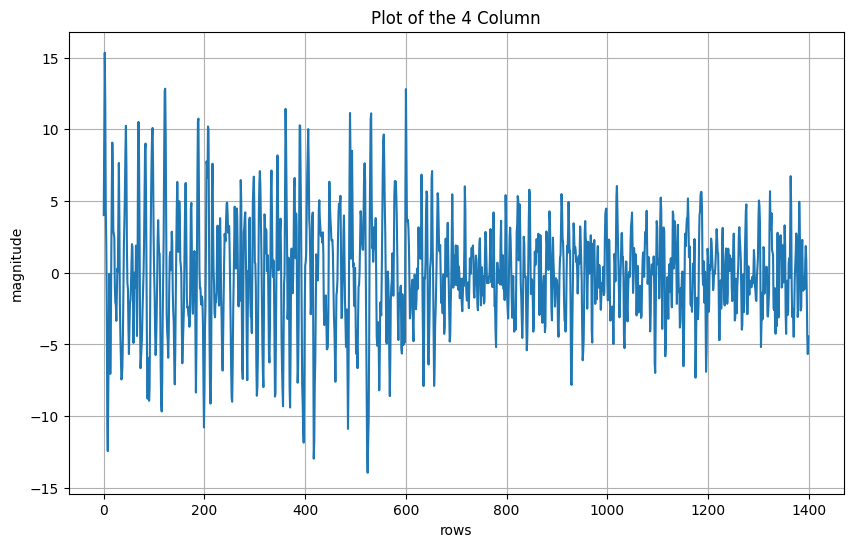

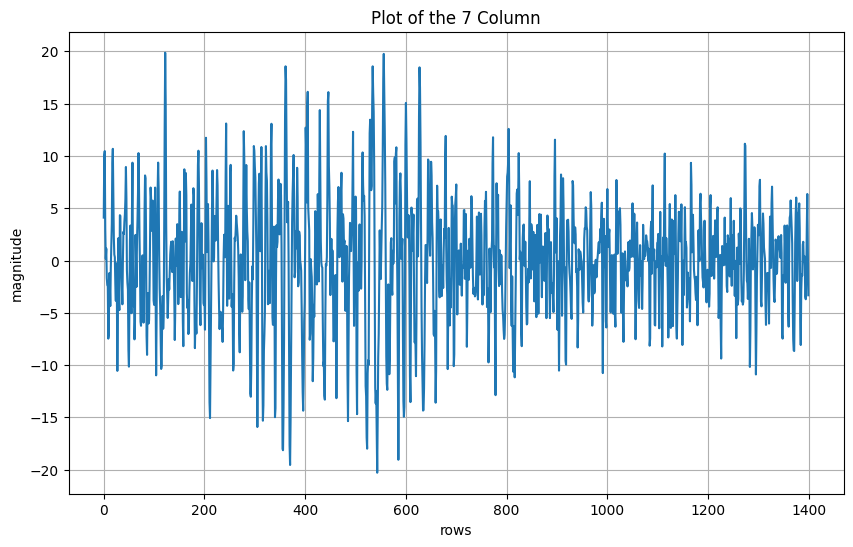

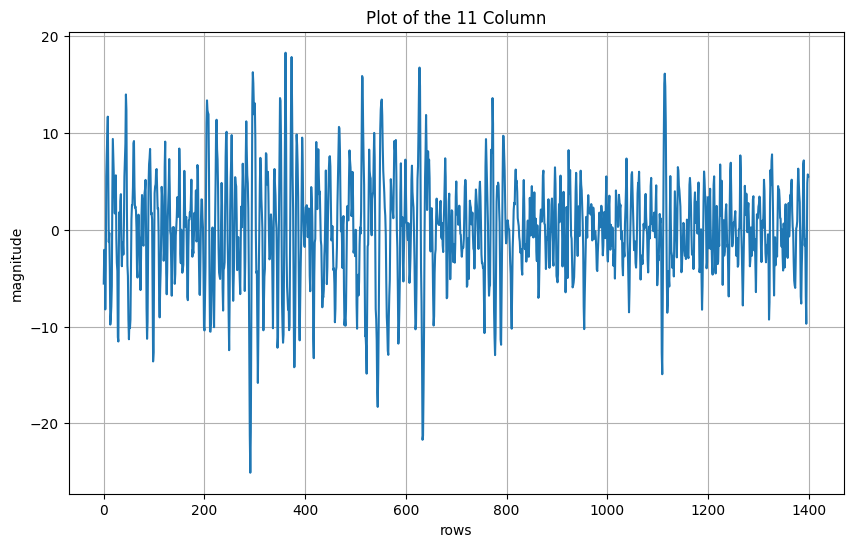

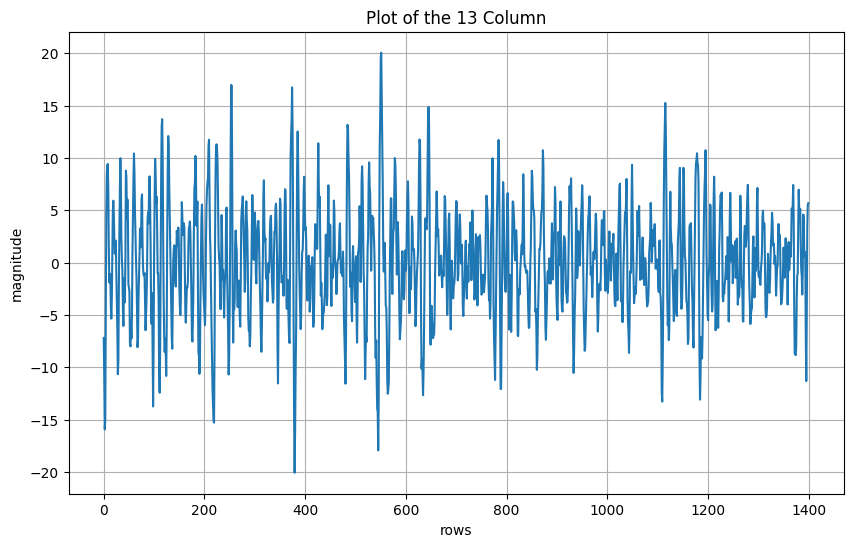

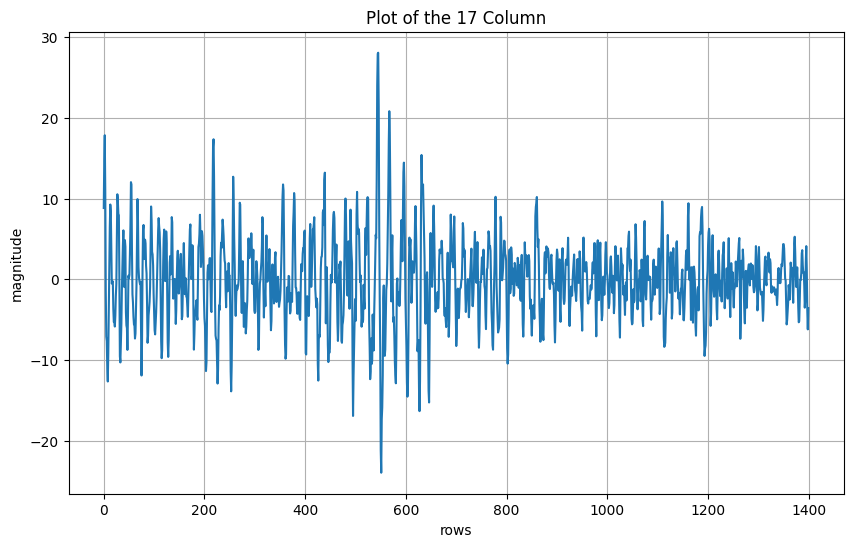

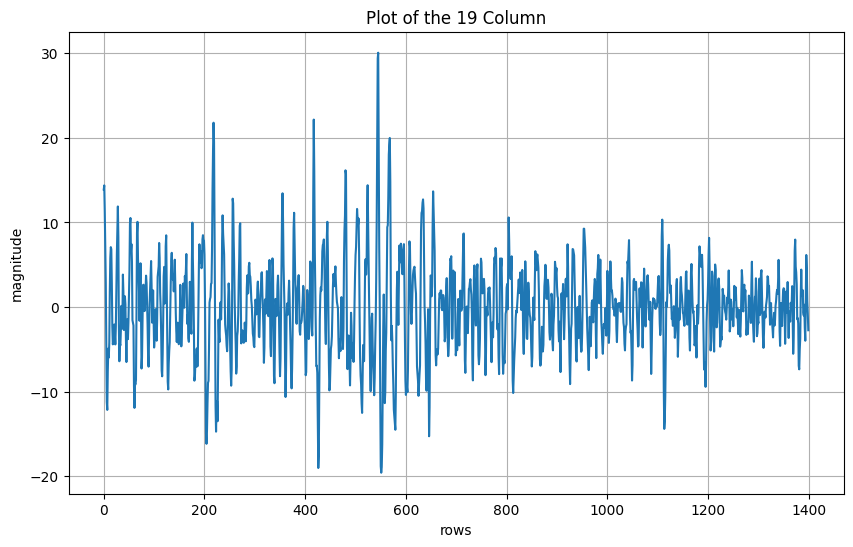

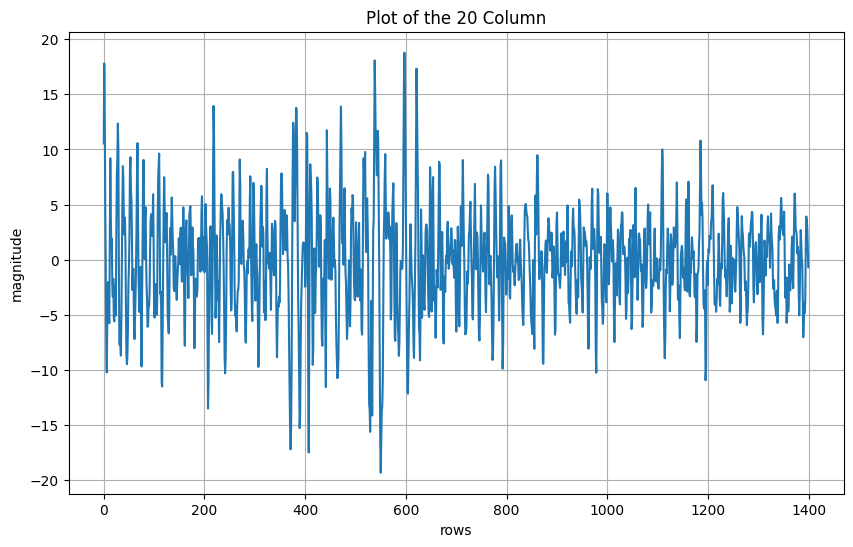

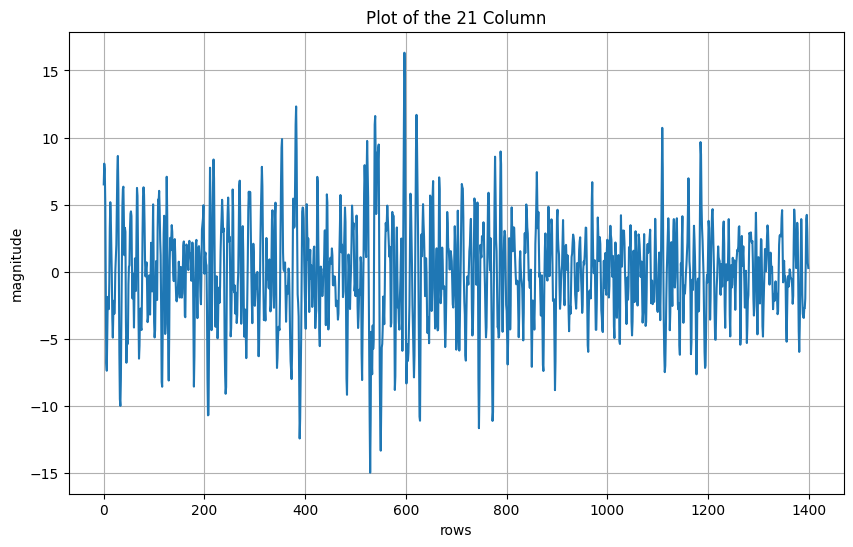

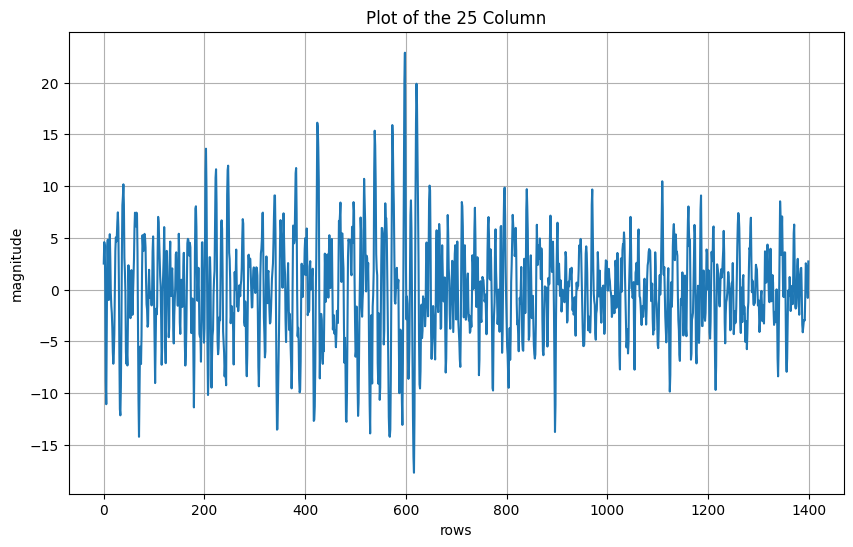

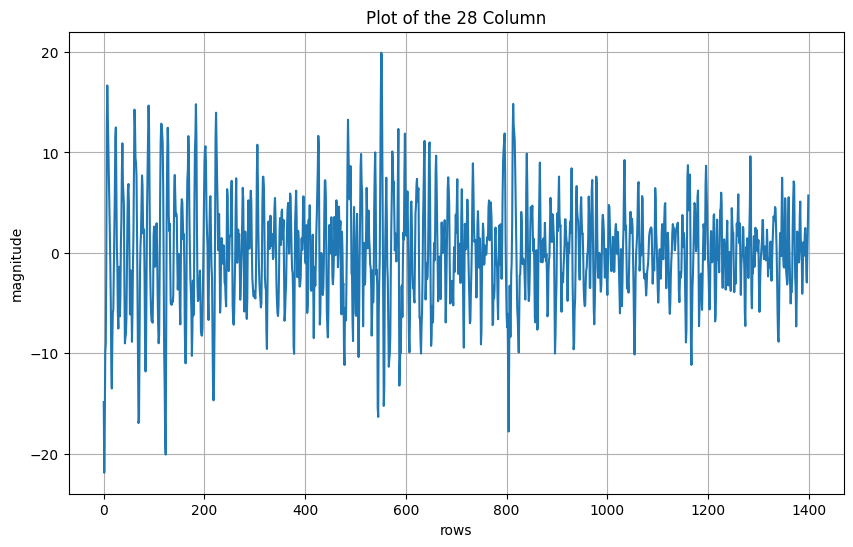

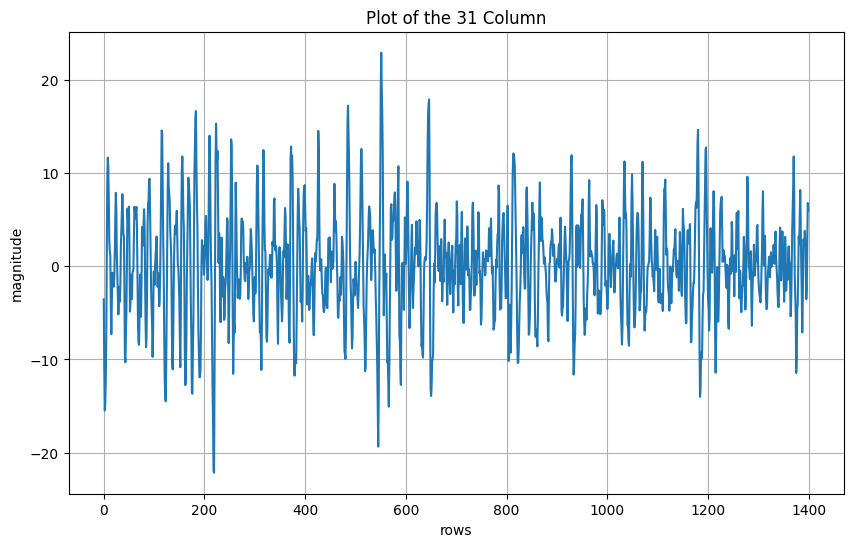

In [7]:
data1_1 = video1_1.get_data()
print(data1_1.shape)
# Plot firt video time signal for every channel
print(data1_1.columns)
for index , column in enumerate(data1_1.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(data1_1.iloc[:, index].head(1400))
    plt.title(f"Plot of the {column} Column")
    plt.xlabel('rows')
    plt.ylabel('magnitude')
    plt.grid(True)
    plt.show()

In [8]:
# download csv
directory = '~/data'
filename = 'my_csv.csv'
filepath = os.path.join(directory, filename)
data1_1.iloc[:1280,:].to_csv(filepath, index = False)

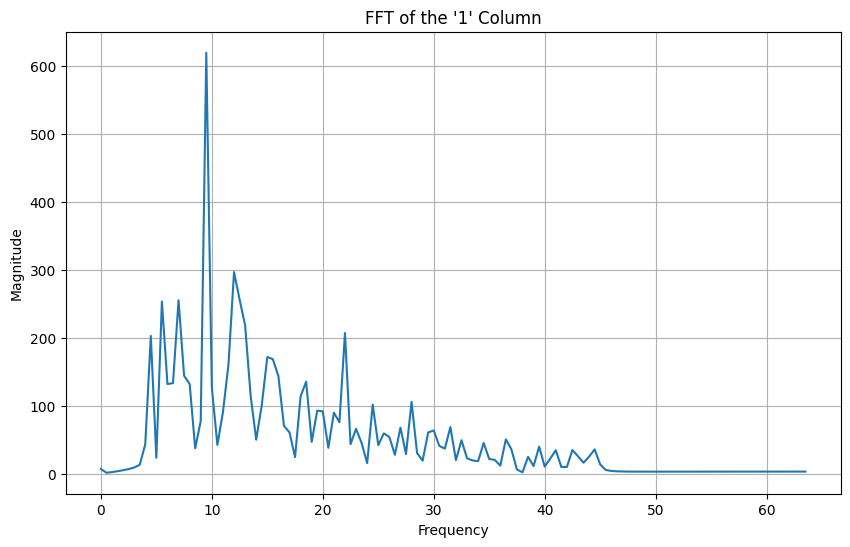

In [9]:
num_samples = 256
window_size = 256
seconds = 2
sample_rate = window_size // seconds
column_data = data1_1.iloc[:num_samples, 1]
fft_result = np.fft.fft(column_data)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(len(column_data), d = 1/ sample_rate)

# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(frequencies[0:num_samples // 2], fft_magnitude[0:num_samples // 2])  # Plot only positive frequencies
plt.title("FFT of the '1' Column")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [10]:
channel1_1_1 = video1_1.get_channel(1)

In [11]:
channel1_data = channel1_1_1.get_channel_data()
channel1_data = channel1_data.iloc[0:256]

In [12]:
window1 = channel1_1_1.perform_fft(channel1_data)
channel1_1_1.add_window(1,window1)
window1_inst = channel1_1_1.get_window(1)
window1_inst

In [13]:
window1_inst.aggregate_frequency_bands()
window1_inst.get_frequency_bands()

{'delta': 5.609732373603032,
 'theta': 23.679253199429898,
 'alpha': 657.9458623373882,
 'beta': 2732.7552719804908,
 'gamma': 1817.3753357147252}

In [14]:
print(window1_inst.get_frequency_bands_values())

[   5.60973237   23.6792532   657.94586234 2732.75527198 1817.37533571]
